# 빅데이터 - 부동산 데이터 분석 프로젝트!

---


---

## - 2. '부동산 가격' 데이터 분석 준비하기

---

크롤링 후 결과 값으로 나온 CSV 파일의 이름을 바꿔주어야 한다. => songpa_apt.csv

##### - 폰트 깨짐현상을 막기 위해 font를 다운로드

In [1]:
# 한글 깨짐 현상을 위한 font 다운로드(다운해도 깨짐현상이 지속)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (24.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


---

### 2-1. 데이터 전처리 후 지도에 핀으로 표시하여 시각화




#### 2-1-1. 데이터 추출
- 최근 가격 변동이 존재하는 아파트(df_test)
- 매매호가의 데이터가 존재하는 아파트(df_change_price)
- 가격의 데이터가 존재하는 아파트(df_price_nan)

- 모든 데이터 추출 완료(df_final)

In [2]:
%reset -f
import pandas as pd

# 서울시 송파구.csv파일명을 sonpa_apt로 바꾸어 작업해야 한다.
df = pd.read_csv('/content/songpa_apt.csv',encoding="CP949")

# 최근 가격 변동이 존재하는 아파트
df_test_price = df[:]
df_test = df_test_price.dropna(how='any', subset=['최근가격변동'], axis=0)
# print(df_test.head())

# 매매호가가 NaN인 데이터들 제거
df_change_price = df_test_price.dropna(how='any', subset=['매매호가'], axis=0)


# 가격이 NaN인 데이터 제거
df_price_nan = df_change_price.dropna(how='any', subset=['가격'], axis=0)

df_final = df_price_nan[:]




#### 2-1-2. 데이터 시각화
- 추출이 끝난 데이터들을 지도를 통해 확인해보자.

In [3]:
import pandas as pd
import folium

# 지도 만들기
smap = folium.Map(location=[37.5144533,127.1059047], tiles='Stamen Terrain', zoom_start=15)

# 아파트 이름과 가격 정보를 넣어 핀을 찍는다
for name,price , lat, lng in zip(df_final.아파트명,df_final.매매호가, df_final.latitude, df_final.longitude):
  folium.Marker([lat,lng], popup=[name,price]).add_to(smap)

smap

---
### 2-2. 초등학교 학군에 따른 세대수 차이가 있을까?

#### 2-2-1. 데이터 전처리

- 데이터 불러오기

In [4]:
%reset -f
import pandas as pd

df = pd.read_csv('/content/songpa_apt.csv',encoding="CP949")





- 데이터 검토하기

In [5]:
# 크롤링 데이터
print(df.head())

   Unnamed: 0   아파트명    면적               법정동주소                 도로명주소  \
0           0  GS프라자   169  서울시 송파구 가락동 197-12  서울시 송파구 동남로14길 17-25   
1           1  SD펠리체  88A㎡   서울시 송파구 가락동 198-7   서울시 송파구 동남로14길 23-9   
2           2  SD펠리체  88B㎡   서울시 송파구 가락동 198-7   서울시 송파구 동남로14길 23-9   
3           3  SD펠리체  89C㎡   서울시 송파구 가락동 198-7   서울시 송파구 동남로14길 23-9   
4           4  SD펠리체  89D㎡   서울시 송파구 가락동 198-7   서울시 송파구 동남로14길 23-9   

    latitude   longitude   세대수  임대세대수  최고층  ...  겨울관리비  여름관리비     매매호가  전세호가  \
0  37.493070  127.132218  18.0    0.0  9.0  ...    NaN    NaN  11억~13억   NaN   
1  37.492402  127.132056  18.0    0.0  6.0  ...    NaN    NaN      NaN   NaN   
2  37.492402  127.132056  18.0    0.0  6.0  ...    NaN    NaN       8억   NaN   
3  37.492402  127.132056  18.0    0.0  6.0  ...    NaN    NaN      NaN   NaN   
4  37.492402  127.132056  18.0    0.0  6.0  ...    NaN    NaN      NaN   NaN   

   월세호가  실거래가  초등학교_학군정보 초등학교_설립정보 초등학교_남학생수 초등학교_여학생수  
0   NaN   NaN   서울가동초등학교     

In [6]:
# 데이터 행, 열 개수 출력
print(df.shape)

(2661, 25)


In [7]:
# 데이터 정보 출력
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661 entries, 0 to 2660
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2661 non-null   int64  
 1   아파트명        2661 non-null   object 
 2   면적          2661 non-null   object 
 3   법정동주소       2661 non-null   object 
 4   도로명주소       2661 non-null   object 
 5   latitude    2661 non-null   float64
 6   longitude   2661 non-null   float64
 7   세대수         2661 non-null   float64
 8   임대세대수       2661 non-null   float64
 9   최고층         2661 non-null   float64
 10  최저층         2661 non-null   float64
 11  해당면적_세대수    2661 non-null   int64  
 12  현관구조        2661 non-null   object 
 13  가격          839 non-null    float64
 14  최근가격변동      839 non-null    float64
 15  겨울관리비       727 non-null    float64
 16  여름관리비       727 non-null    float64
 17  매매호가        791 non-null    object 
 18  전세호가        694 non-null    object 
 19  월세호가        469 non-null   

In [8]:
# 데이터 요약 통계량
print(df.describe())

        Unnamed: 0     latitude    longitude          세대수        임대세대수  \
count  2661.000000  2661.000000  2661.000000  2661.000000  2661.000000   
mean   1330.000000    37.502460   127.121149   457.789177    27.172492   
std     768.308857     0.012991     0.017940  1341.492538   161.309050   
min       0.000000    37.474793   127.072940     2.000000     0.000000   
25%     665.000000    37.494771   127.112527    19.000000     0.000000   
50%    1330.000000    37.502753   127.121814    40.000000     0.000000   
75%    1995.000000    37.510348   127.133834   311.000000     0.000000   
max    2660.000000    37.539940   127.159191  9510.000000  1401.000000   

               최고층          최저층     해당면적_세대수             가격        최근가격변동  \
count  2661.000000  2661.000000  2661.000000     839.000000    839.000000   
mean     13.287862     9.070274    45.598647  146860.309893   -556.019070   
std       9.135107     5.960202   147.151019   63289.172542   1864.276688   
min       3.000000     2.

- 데이터 검토하기

In [9]:
# 초등학교 학군정보를 통한 데이터 확인

# 변수 타입
print(df['초등학교_학군정보'].dtypes)


object


In [10]:

# 학교 별 빈도 구하기
print(df['초등학교_학군정보'].value_counts())

서울방이초등학교     201
서울신가초등학교     191
서울오금초등학교     152
서울문덕초등학교     139
서울방산초등학교     129
서울송파초등학교     124
서울위례별초등학교    114
서울잠동초등학교     106
서울가동초등학교     101
서울거여초등학교      95
서울잠전초등학교      94
서울중대초등학교      90
서울삼전초등학교      89
서울석촌초등학교      76
서울영풍초등학교      76
서울마천초등학교      73
서울토성초등학교      63
서울문정초등학교      58
서울남천초등학교      55
서울풍납초등학교      52
서울풍성초등학교      51
서울거원초등학교      50
서울개롱초등학교      49
서울평화초등학교      45
서울가락초등학교      43
서울문현초등학교      38
서울가주초등학교      33
서울위례솔초등학교     32
서울송례초등학교      31
서울송전초등학교      31
서울아주초등학교      31
서울잠신초등학교      22
서울세륜초등학교      17
서울잠실초등학교      16
서울버들초등학교       6
서울가원초등학교       6
서울신천초등학교       5
서울잠일초등학교       5
Name: 초등학교_학군정보, dtype: int64


#### 2-2-2. 데이터 시각화

72


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_

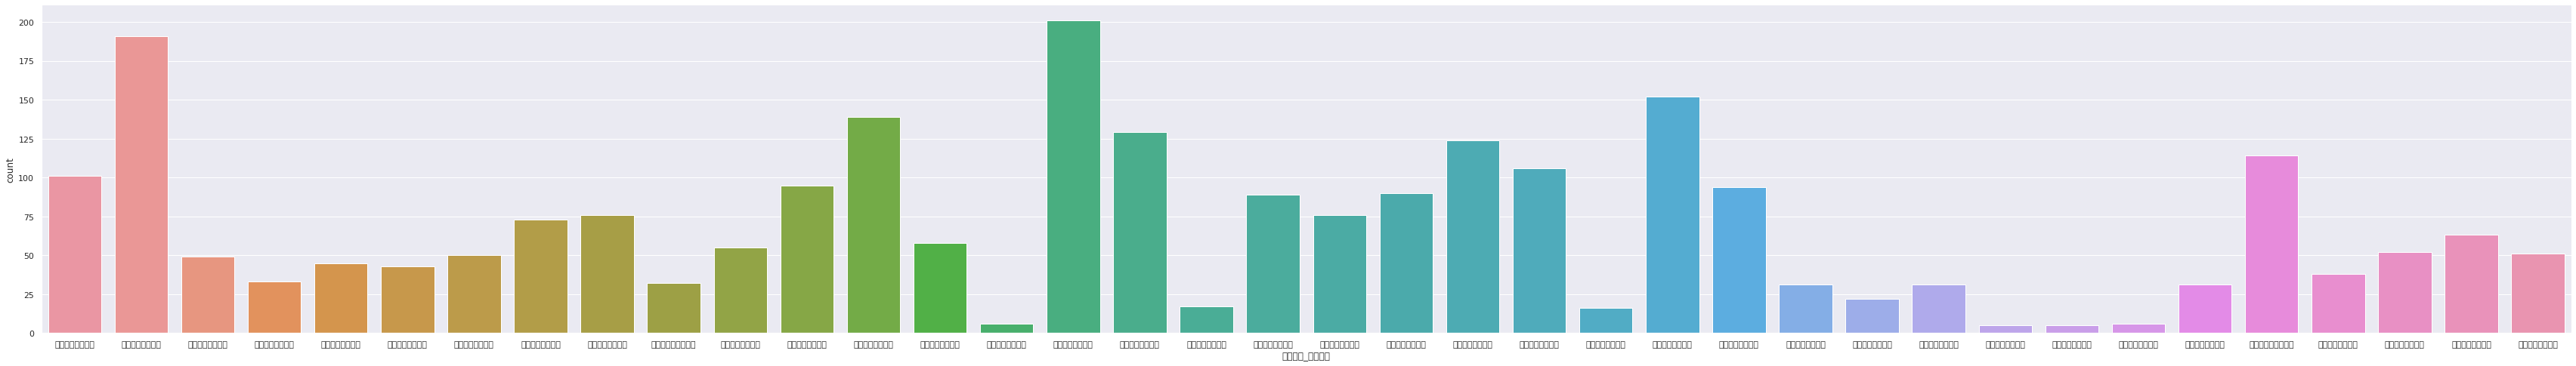

In [11]:
import seaborn as sns
# 결측치 확인
print(df['초등학교_학군정보'].isna().sum())

# 학군 정보에 해당하는 아파트 개수 그래프
df_school = df.dropna(how='any', subset=['초등학교_학군정보'], axis=0)
sns.set(rc={'figure.figsize':(60,8)},font="NanumBarunGothic")
sns.countplot(data=df_school, x='초등학교_학군정보')



---

### 2-3. 초등학교 공립과 혁신 학군의 아파트 가격의 평균은 어떻게 될까?

#### 2-3-1. 데이터 전처리

In [12]:

df_school = df.dropna(how='any', subset=['초등학교_설립정보'], axis=0)
df_school_establish_price = df_school.dropna(how='any', subset=['가격'], axis=0)


# group을 이용하여 학군으로 그루핑
grouped_school_establish_price = df_school_establish_price.groupby(['초등학교_설립정보'])

# 학군에 해당하는 아파트들의 평균 가격
grouped_school_establish_price_mean = grouped_school_establish_price.mean()
print(grouped_school_establish_price_mean["가격"])




초등학교_설립정보
공립    143168.426573
혁신    168148.185484
Name: 가격, dtype: float64


#### 2-3-2. 데이터 시각화

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_

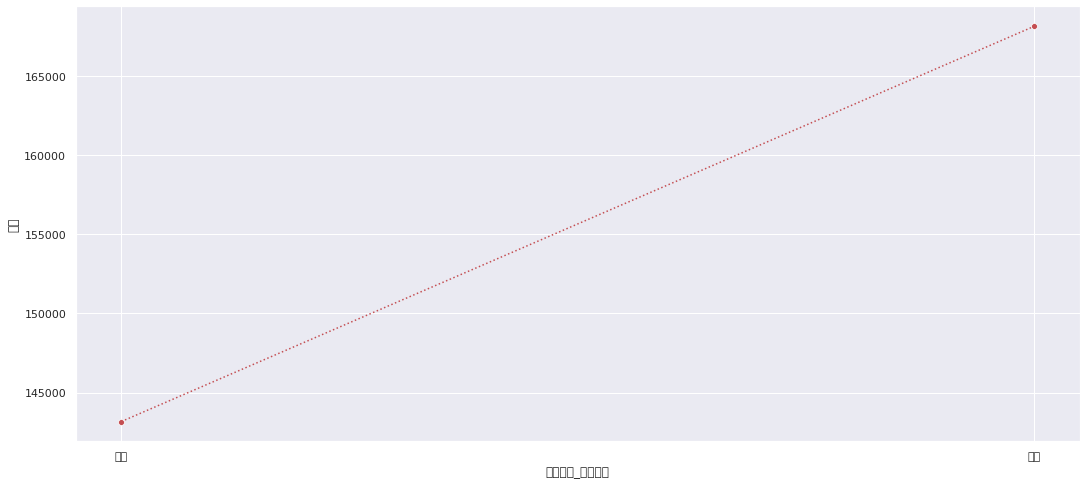

In [13]:
import seaborn as sns
# lineplot 그래프
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,8)},font="NanumBarunGothic")
sns.lineplot(data=grouped_school_establish_price_mean, x='초등학교_설립정보',y='가격', marker='o', color='r', linestyle=':')

---

### 2-4. 송파구에 가격이 하락하는 아파트의 비율은 어떻게 될까?



#### 2-4-1. 데이터 전처리하기
- numpy를 사용하여 다양한 데이터들을 추출한다.
- 아파트 가격이 변화한 비율을 songpa_change_rate의 열로 추가해 준다.
- 아파트 가격이 변화하지 않은 데이터들을 삭제한다.

- 최근 하락 추세, 하락하는 아파트 개수, 하락하는 아파트 비율을 확인한다.

- 하락하는 아파트들을 지도를 통해 시각적으로 확인한다.

In [14]:
%reset -f
import pandas as pd

# 서울시 송파구.csv파일명을 sonpa_apt로 바꾸어 작업해야 한다.
df = pd.read_csv('/content/songpa_apt.csv',encoding="CP949")

# 최근 가격 변동이 존재하는 아파트
df_test_price = df[:]
df_test = df_test_price.dropna(how='any', subset=['최근가격변동'], axis=0)
# print(df_test.head())

# 매매호가가 NaN인 데이터들 제거
df_change_price = df_test_price.dropna(how='any', subset=['매매호가'], axis=0)


# 가격이 NaN인 데이터 제거
df_price_nan = df_change_price.dropna(how='any', subset=['가격'], axis=0)

df_final = df_price_nan[:]



In [15]:
import numpy as np

# 아파트 가격이 변화한 비율을 추가(값이 워낙 작아 100을 곱해준다)
def songpa_minus_apt(a, b):
  return round((a/(a+b))*100)

df_final['songpa_change_rate'] = df_final.apply(lambda x: songpa_minus_apt(x['최근가격변동'],x['가격']), axis=1)

# 아파트 변동 가격의 비율이 0인 데이터 없애기 전처리
df_final['songpa_change_rate'].replace(0,np.nan, inplace=True)
df_final.dropna(subset=['songpa_change_rate'], axis=0, inplace=True)





<ipython-input-15-3536c7594f1a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['songpa_change_rate'] = df_final.apply(lambda x: songpa_minus_apt(x['최근가격변동'],x['가격']), axis=1)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [16]:
# 아파트 변동 가격의 평균(- 값일 경우 대세 하락, + 값일 경우 대세 상승)
print("최근 하락 추세 : ",end="")
print(df_final['songpa_change_rate'].mean())


최근 하락 추세 : -2.688679245283019


In [17]:
# 하락하는 아파트 개수
print("하락하는 아파트 개수 : ",end="")
print(df_final['songpa_change_rate'].count())


하락하는 아파트 개수 : 106


In [18]:

# 하락하는 아파트의 비율
print("하락하는 아파트 비율 :",end="")
print((df_final['songpa_change_rate'].count()/df_price_nan['최근가격변동'].count()))


하락하는 아파트 비율 :0.18861209964412812


In [19]:
import folium
# 송파구청을 시작 위치로 설정한다.
smap = folium.Map(location=[37.5144533,127.1059047],  zoom_start=15)

for name,rate , lat, lng in zip(df_final.아파트명,df_final.songpa_change_rate, df_final.latitude, df_final.longitude):
  folium.CircleMarker([lat,lng],
                      radius=10,
                      color='brown',
                      fill=True,
                      fill_color='coral',
                      fill_opacity=0.7,
                      popup=[name,rate]).add_to(smap)
smap


#### 2-4-2. 데이터 시각화

- 가격의 변동을 matplotlib의 pie chart를 활용하여 비율비교를 하였다.

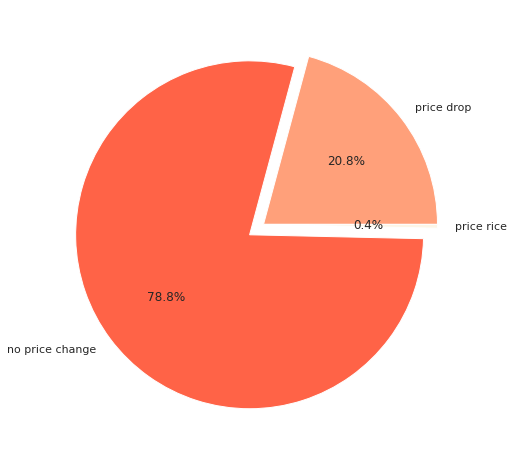

In [20]:
import matplotlib.pyplot as plt


# 가격이 하락하는 아파트의 개수
price_change_minus=sum(df_price_nan.최근가격변동 < 0)
# 가격 변동이 없는 아파트의 개수
price_change_zero=sum(df_price_nan.최근가격변동 == 0)
# 가격이 상승하는 아파트의 개수
price_change_plus=sum(df_price_nan.최근가격변동 > 0)

ratio=[price_change_minus, price_change_zero, price_change_plus]
labels=['price drop', 'no price change', 'price rice']
# labels=['가격 하락', '가격변동없음', '가격 상승']
explode = [0, 0.1, 0]
colors=['lightsalmon','tomato','oldlace']
plt.pie(ratio, labels=labels,colors=colors, explode=explode, autopct='%.1f%%')

plt.show()


- 학군에 해당하는 아파트들의 평균 가격을 lineplot 그래프로 나타낸다.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_

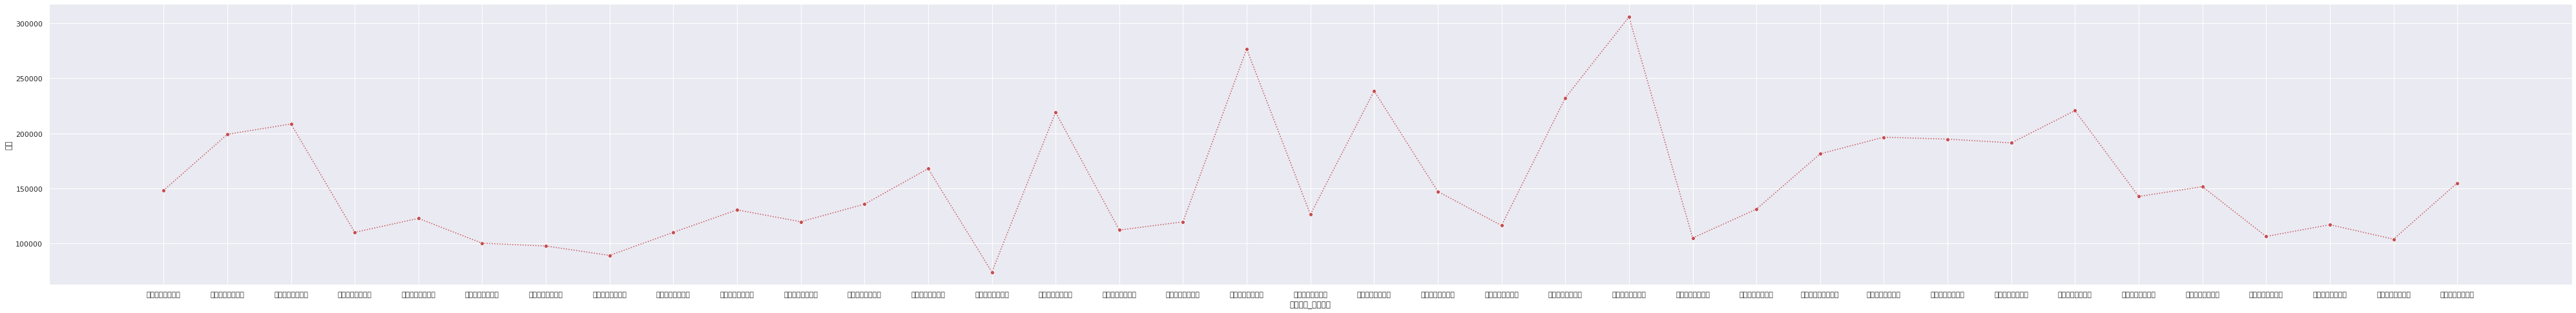

In [21]:
import seaborn as sns

# 학군에 따른 가격 분포
df_school_zone=df_price_nan[:]

# 학군이 없는 데이터들을 제거
df_school_zone = df_school_zone.dropna(how='any', subset=['최근가격변동'], axis=0)


# group을 이용하여 학군으로 그루핑
grouped_school = df_school_zone.groupby(['초등학교_학군정보'])

# 학군에 해당하는 아파트들의 평균 가격
grouped_school_price_mean = grouped_school.mean()

# lineplot 그래프
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(70,8)},font="NanumBarunGothic")
sns.lineplot(data=grouped_school_price_mean, x='초등학교_학군정보',y='가격', marker='o', color='r', linestyle=':')
